In [1742]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1743]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

#aea_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inteligencia Artificial/WA_Fn-UseC_-HR-Employee-Attrition.csv')
aea_df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
aea_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [1744]:
aea_df['OverTime']

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
1465     No
1466     No
1467    Yes
1468     No
1469     No
Name: OverTime, Length: 1470, dtype: object

Carga la base de datos y realiza los análisis necesarios para responder a las siguientes
preguntas:
* a) ¿Cuántas y cuáles de las variables son numéricas?
  1. i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?
  #### 26
  2. ii. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?
  #### 0
  3. iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden
  anular del problema? Justifica tu respuesta.
  ####  Employee count: Todos los valores en la tabla son iguales no tiene valor en el analisis.
####  StandardHours: Es un valor unico no tiene relevancia en el analisis.
####  Employee Number: Es un identificador unico por empleado no tiene relevancia en el analisis.

* b) ¿Cuántas y cuáles de las variables son categóricas?

  ### 9

  1. i. ¿Cuántas y cuáles de estas variables son binarias?



      *   Attrition
      *   Gender
      *   Over18
      *   OverTime
      *   Department
      *   BusinessTravel

  2. ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de
  niveles que tiene cada una de estas variables.
      
      *   EducationField
      *   MaritalStatus


  3. iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles

      *   PerformanceRating
      *   Education
      *   EnvironmentSatisfaction
      *   JobInvolvement
      *   JobSatisfaction
      *   RelationshipSatisfaction
      *   WorkLifeBalance

que tiene cada una de estas variables.
iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden
anular del problema? Justifica tu respuesta.

Over18 -> todos los valores son iguales

* c) En esta base de datos y con base a la información dada, ¿existe alguna o algunas
variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y
por qué?

In [1745]:
aea_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [1746]:
aea_df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [1747]:
aea_df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [1748]:
aea_df.drop(columns=["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"], inplace=True)

In [1749]:
Xtrain, XTestTemp, ytrain, ytestTemp = train_test_split(aea_df, aea_df['Attrition'], test_size=0.30, random_state=1, stratify=aea_df['Attrition'])
Xtest, Xval, ytest, yval = train_test_split(XTestTemp, ytestTemp, test_size=0.5, random_state=1)

In [1750]:
Xtrain.shape

(1029, 31)

In [1751]:
Xtest.shape

(220, 31)

In [1752]:
Xval.shape

(221, 31)

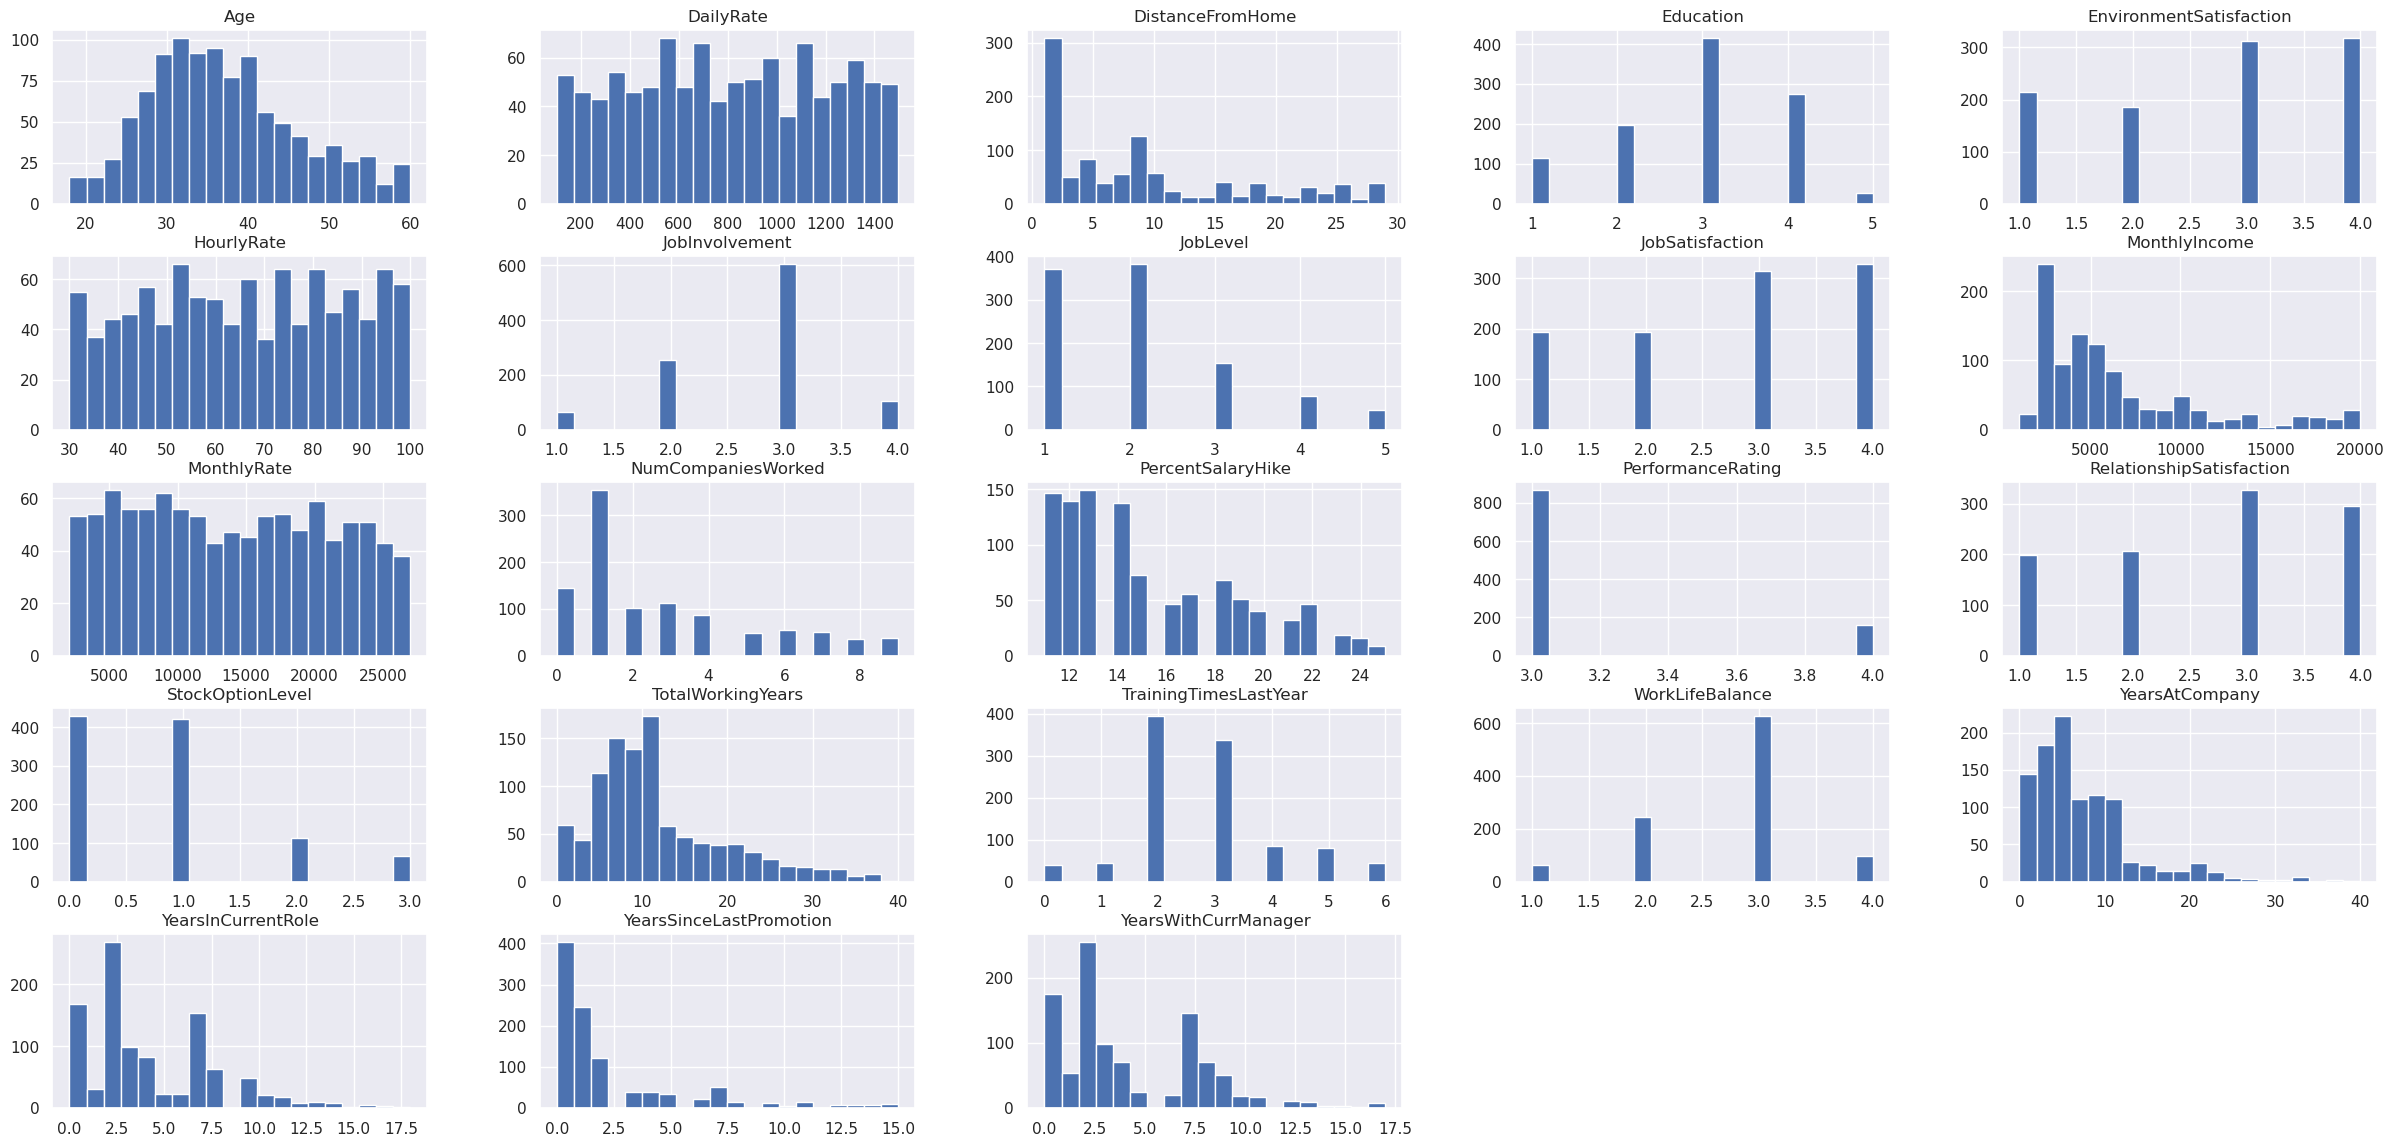

In [1753]:
Xtrain.select_dtypes(include=['number']).hist(figsize=(30,14), bins=20)
plt.show()

Yo suguiero transformar con MinMaxScaler() todas las columnas para que esten a la misma escala. 

In [1754]:
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
misdatos = Xtrain.select_dtypes(include=['number'])
variables_a_transformar = misdatos
variables_a_transformar

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1073,28,1083,29,1,3,96,1,2,2,6549,...,3,2,2,8,2,2,8,6,1,7
1105,33,1242,8,4,1,46,3,2,1,6392,...,3,4,1,8,6,1,2,2,2,2
538,41,314,1,3,4,59,2,5,3,19189,...,3,2,1,22,3,3,22,7,2,10
1300,34,810,8,2,2,92,4,2,3,6799,...,4,3,2,10,5,3,10,8,4,8
1382,31,976,3,2,3,48,3,1,1,3065,...,3,4,1,4,3,4,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,37,1372,1,3,4,42,3,1,4,2115,...,3,2,0,17,3,3,17,12,5,7
125,26,841,6,3,3,46,2,1,2,2368,...,3,3,0,5,3,2,5,4,4,3
160,22,1256,19,1,3,80,3,1,4,2323,...,4,1,2,2,6,3,2,2,2,2
691,40,1469,9,4,4,35,3,1,2,3617,...,3,4,1,3,2,3,1,1,0,0


In [1755]:
variables_a_transformar = ['DailyRate', 'DistanceFromHome',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [1756]:
len(variables_a_transformar)

13

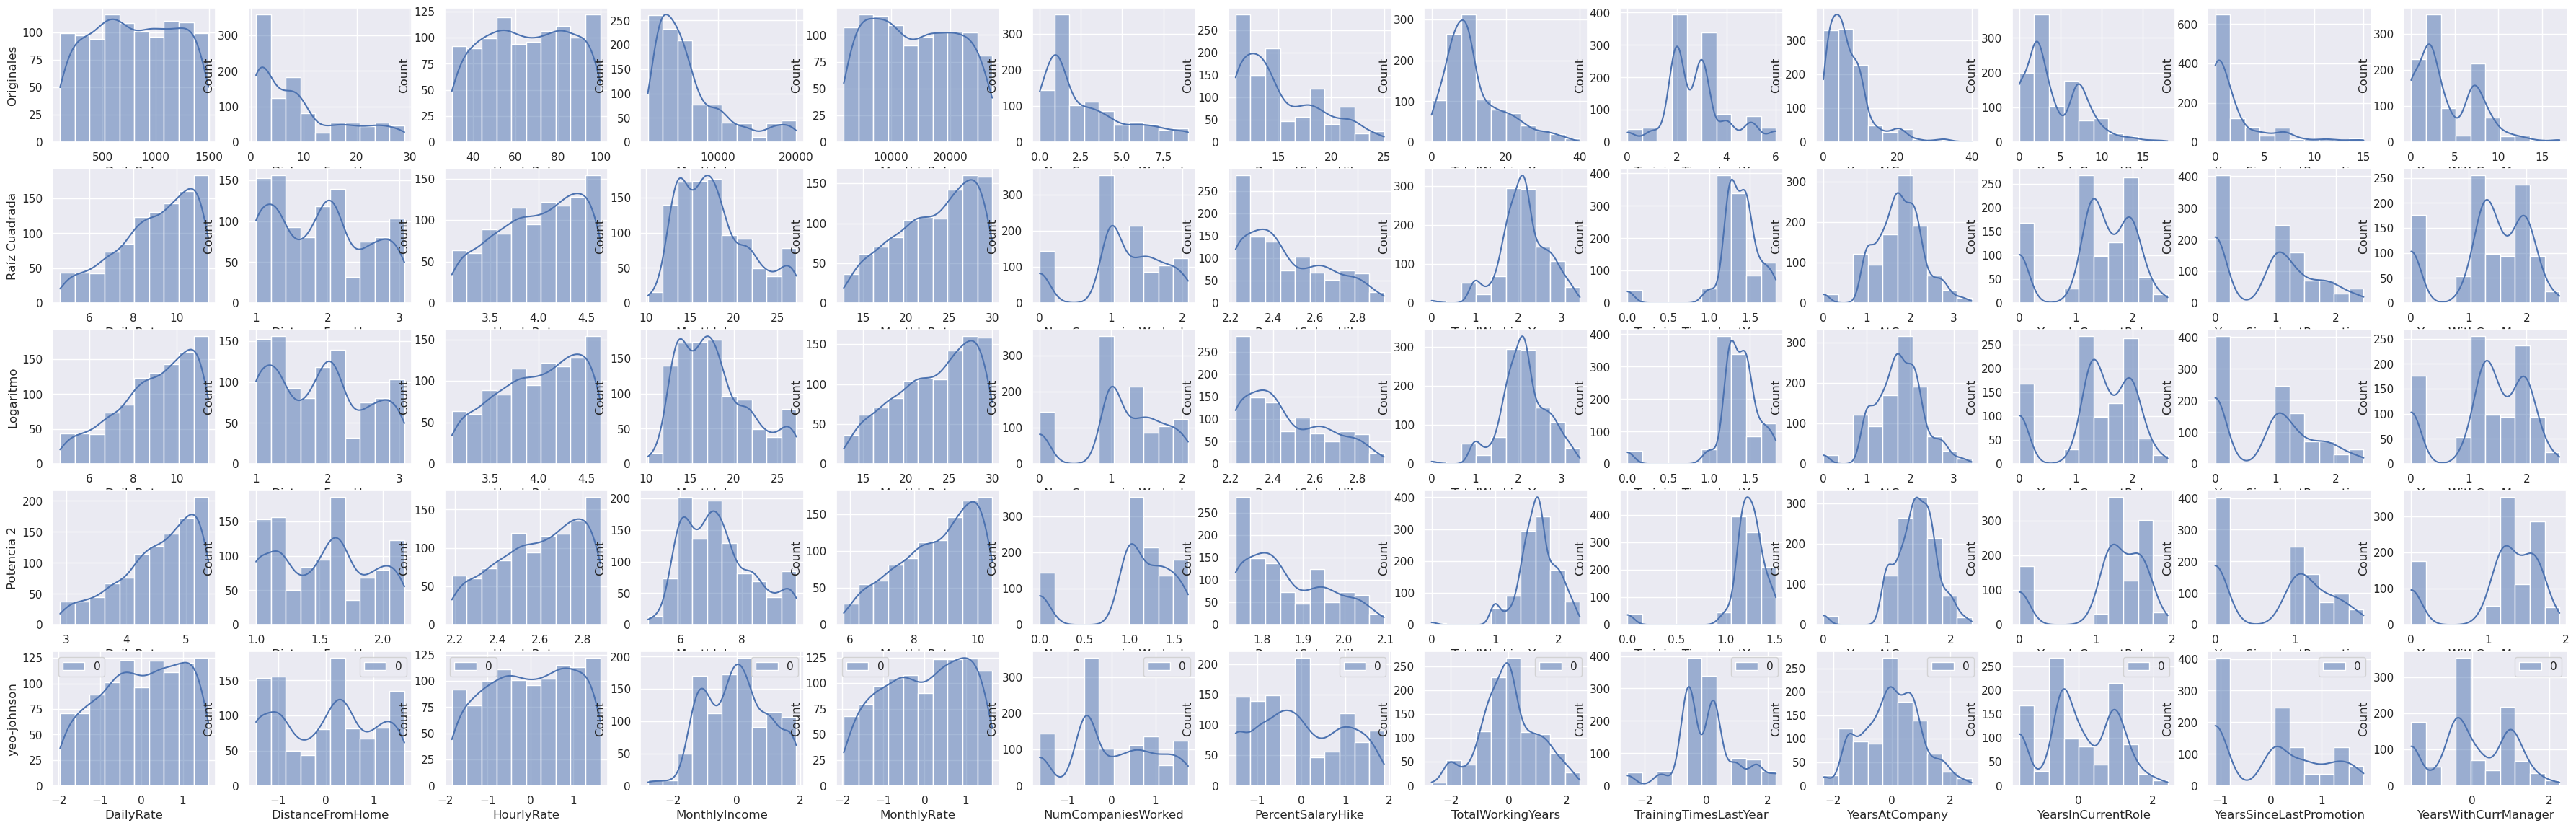

In [1757]:
sns.set(rc={'figure.figsize':(45,14)})


columns = len(variables_a_transformar)
fig, axes = plt.subplots(5, columns)

for k in range(0,columns):

    # Datos originales ---------------------------------------------------------
    plt.subplot(5,columns,k+1)

    Transf0 = misdatos[variables_a_transformar[k]]         #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    sns.histplot(Transf0, bins=10, kde=True)                             #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,columns,k+14)

    Transf1 = np.cbrt(misdatos[variables_a_transformar[k]])   #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=10, kde=True)                                #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,columns,k+27)

    Transf2 = np.log(misdatos[variables_a_transformar[k]]+1)  #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf1, bins=10, kde=True)                              #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,columns,k+40)

    Transf3 = np.power(misdatos[variables_a_transformar[k]], .23)  #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    sns.histplot(Transf3, bins=10, kde=True)                               #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')


    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,columns,k+53)

    Transf4 = power_transform(misdatos[variables_a_transformar[k]].values.reshape(-1,1), method='yeo-johnson') #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    sns.histplot(Transf4, bins=10, kde=True)                    #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('yeo-johnson')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################



plt.show()

DistanceFromHome            = True -> YeoJohnson
percentSalaryHike           = True -> YeoJohnson
MonthlyIncome               = True -> CBRT
YearsAtCompany              = True -> CBRT
YearsSinceLastPromotion     = True -> CBRT
YearsWithCurrManager        = True -> SQRT
YearsInCurrentRole          = True -> SQRT
TotalWorkingYars            = True -> SQRT
NumCompaniesWorked          = True -> SQRT
DayliRate                   = False
HourlyRate                  = False
MonthlyRate                 = False
TrainningTimesLastYear      = False

In [1758]:
#XtrainT, XvalT y XtestT.
XtrainT = Xtrain.copy()
XvalT = Xval.copy()
XtestT = Xtest.copy()

XtrainT

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1073,28,No,Travel_Rarely,1083,Research & Development,29,1,Life Sciences,3,Male,...,3,2,2,8,2,2,8,6,1,7
1105,33,No,Travel_Rarely,1242,Sales,8,4,Life Sciences,1,Male,...,3,4,1,8,6,1,2,2,2,2
538,41,No,Travel_Rarely,314,Human Resources,1,3,Human Resources,4,Male,...,3,2,1,22,3,3,22,7,2,10
1300,34,No,Travel_Rarely,810,Sales,8,2,Technical Degree,2,Male,...,4,3,2,10,5,3,10,8,4,8
1382,31,No,Non-Travel,976,Research & Development,3,2,Medical,3,Male,...,3,4,1,4,3,4,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,37,No,Travel_Rarely,1372,Research & Development,1,3,Life Sciences,4,Female,...,3,2,0,17,3,3,17,12,5,7
125,26,No,Travel_Rarely,841,Research & Development,6,3,Other,3,Female,...,3,3,0,5,3,2,5,4,4,3
160,22,No,Travel_Rarely,1256,Research & Development,19,1,Medical,3,Male,...,4,1,2,2,6,3,2,2,2,2
691,40,No,Travel_Frequently,1469,Research & Development,9,4,Medical,4,Male,...,3,4,1,3,2,3,1,1,0,0


In [1759]:

YeoJohnson = ['DistanceFromHome', 'PercentSalaryHike']
CBRTt = ['MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion']
SQRTt = ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']

# TRANS RAIZ CUADRADA
XtrainT[SQRTt] = np.sqrt(XtrainT[SQRTt])
XvalT[SQRTt] = np.sqrt(XvalT[SQRTt])
XtestT[SQRTt] = np.sqrt(XtestT[SQRTt])

# Transformación Raiz cubica
XtrainT[CBRTt] = np.log1p(XtrainT[CBRTt])
XvalT[CBRTt] = np.log1p(XvalT[CBRTt])
XtestT[CBRTt] = np.log1p(XtestT[CBRTt])


# Transformación Yeo-Johnson
XtrainT[YeoJohnson] = power_transform(XtrainT[YeoJohnson], method='yeo-johnson')
XvalT[YeoJohnson] = power_transform(XvalT[YeoJohnson], method='yeo-johnson')
XtestT[YeoJohnson] = power_transform(XtestT[YeoJohnson], method='yeo-johnson')


#HAGO MIS VARIABLES 
ytrainT = ytrain.copy()
yvalT = yval.copy()
ytestT = ytest.copy()

      *   Attrition
      *   Gender
      *   Over18
      *   OverTime

In [1760]:
binaryColumns = ["Gender", "OverTime", "Attrition","BusinessTravel","Department"]
le = LabelEncoder()
# Transformación de las variables binarias con LabelEncoder 
for i in binaryColumns:
    XtrainT[i]
    le.fit(XtrainT[i])
    XtrainT[i] = le.transform(XtrainT[i])
    XvalT[i] = le.transform(XvalT[i])
    XtestT[i] = le.transform(XtestT[i])

In [1761]:
XtrainT[binaryColumns]

,Gender,OverTime,Attrition,BusinessTravel,Department
1073,1,0,0,2,1
1105,1,0,0,2,2
538,1,0,0,2,0
1300,1,0,0,2,2
1382,1,1,0,0,1
...,...,...,...,...,...
285,0,0,0,2,1
125,0,0,0,2,1
160,1,0,0,2,1
691,1,1,0,1,1


In [1762]:
XvalT[binaryColumns]

,Gender,OverTime,Attrition,BusinessTravel,Department
656,1,1,1,2,1
330,0,0,0,1,1
133,1,1,0,2,2
281,1,0,0,2,2
1048,1,0,0,2,2
...,...,...,...,...,...
1232,1,0,0,2,1
881,0,1,0,1,1
1371,0,0,0,2,2
964,0,0,0,2,2


In [1763]:
XtestT[binaryColumns]

,Gender,OverTime,Attrition,BusinessTravel,Department
819,1,0,0,2,1
871,0,0,1,2,1
1213,1,1,1,2,2
119,1,1,0,1,2
544,0,1,0,1,2
...,...,...,...,...,...
68,1,0,0,1,1
383,0,0,0,2,1
361,0,1,0,2,1
526,0,0,0,2,1


In [1764]:
le.fit(ytrainT)
ytrainT=le.transform(ytrainT)
yvalT=le.transform(yvalT)
ytestT=le.transform(ytestT)
ytestT

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [1765]:
variables_a_transformar_ordinales=['PerformanceRating',
'EnvironmentSatisfaction',
'JobInvolvement',
'JobSatisfaction',
'RelationshipSatisfaction',
'WorkLifeBalance',
'Education']

In [1766]:
XtrainT[variables_a_transformar_ordinales].nunique()

PerformanceRating           2
EnvironmentSatisfaction     4
JobInvolvement              4
JobSatisfaction             4
RelationshipSatisfaction    4
WorkLifeBalance             4
Education                   5
dtype: int64

Los valores de estas variables ordinales ya estan en valores enteros. Por lo que no se necesita hacerle ninguna transformacion.

Por ejemplo:

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

Si los valores esubieran en String si se deberia de transformar. Overtime estaba con valoes ['Yes', 'No'] se trandfaron a ['1','0']

In [1767]:
XtrainT.shape

(1029, 31)

In [1768]:
XtrainT

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1073,28,0,2,1083,1,1.648245,1,Life Sciences,3,1,...,3,2,2,2.828427,2,2,2.197225,2.449490,0.693147,2.645751
1105,33,0,2,1242,2,0.247712,4,Life Sciences,1,1,...,3,4,1,2.828427,6,1,1.098612,1.414214,1.098612,1.414214
538,41,0,2,314,0,-1.468777,3,Human Resources,4,1,...,3,2,1,4.690416,3,3,3.135494,2.645751,1.098612,3.162278
1300,34,0,2,810,2,0.247712,2,Technical Degree,2,1,...,4,3,2,3.162278,5,3,2.397895,2.828427,1.609438,2.828427
1382,31,0,0,976,1,-0.682272,2,Medical,3,1,...,3,4,1,2.000000,3,4,1.609438,1.414214,1.098612,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,37,0,2,1372,1,-1.468777,3,Life Sciences,4,0,...,3,2,0,4.123106,3,3,2.890372,3.464102,1.791759,2.645751
125,26,0,2,841,1,-0.041639,3,Other,3,0,...,3,3,0,2.236068,3,2,1.791759,2.000000,1.609438,1.732051
160,22,0,2,1256,1,1.173920,1,Medical,3,1,...,4,1,2,1.414214,6,3,1.098612,1.414214,1.098612,1.414214
691,40,0,1,1469,1,0.369324,4,Medical,4,1,...,3,4,1,1.732051,2,3,0.693147,1.000000,0.000000,0.000000


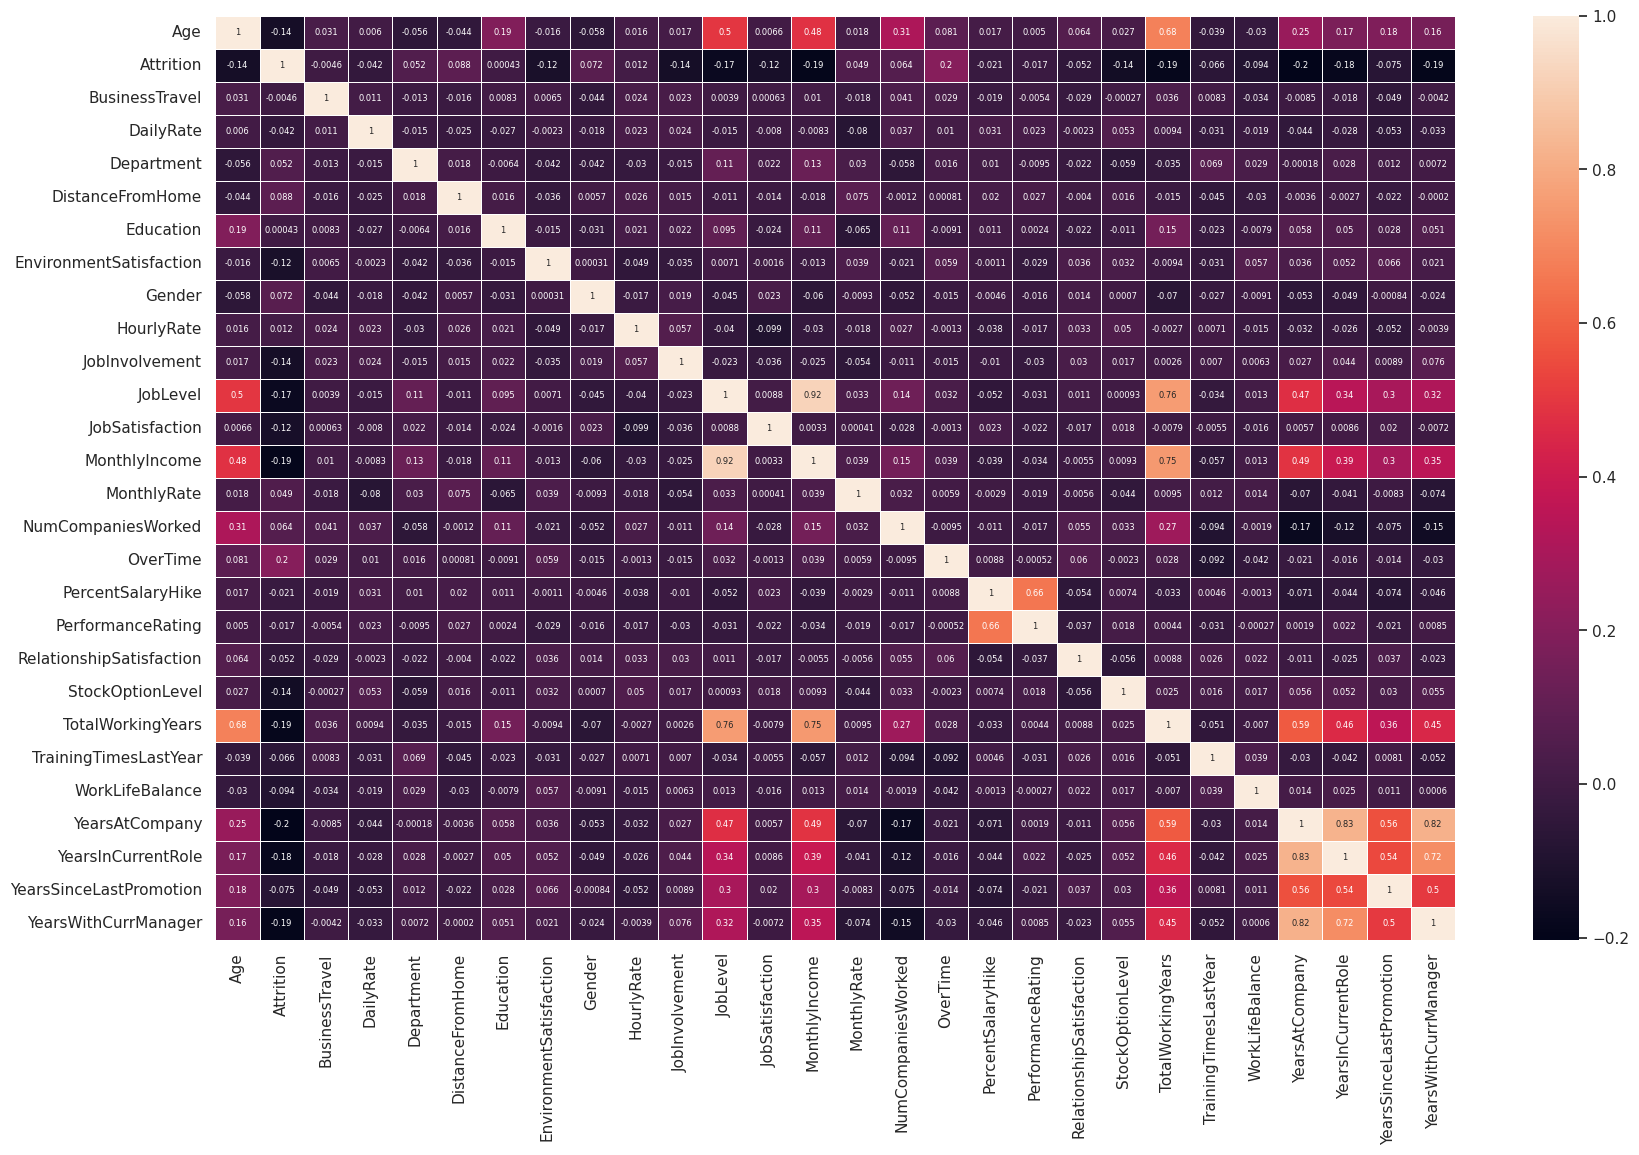

In [1769]:
sns.set(rc={'figure.figsize':(20,12)})
merge = XtrainT
#merge.insert(1, "Attrition", ytrainT, True)
Tcorrelation = merge.corr(method='pearson', numeric_only=True)
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns, annot=True, annot_kws={"size": 6}, linewidth=.5, vmax=1.0)

plt.show()

*Indica las correlaciones positivas “fuertes” entre pares de factores que encuentres
dentro de la matriz.
    Age<->TotalWorkingYears : .67
    Job Level<->TotalWorkingYears : .78
    MonthlyIncome<->TotalWorkingYears : .77
    MonthlyIncome<->JobLevel=.95
    PerformanceRating<->PercentSalaryHike : .76
    TotalWorkingyears<->YearsAtCompany : .67
    YearsAtCompany<->YearswithCurrManager : .77
    YearsAtCompany<->YearsSinceLastPromotion : .62
    YearsAtCompany<->YearsInCurrentRole : .76
    YearsInCurrentRole<->YearswithCurrManager : .73

*Indica las correlaciones negativas “fuertes” entre pares de factores que encuentres
dentro de la matriz.
    


In [1770]:
Tcorrelation

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.135584,0.030711,0.006049,-0.056479,-0.044181,0.190412,-0.016183,-0.057865,0.015638,...,0.005033,0.064320,0.026593,0.684850,-0.039082,-0.029665,0.254844,0.173404,0.184251,0.161754
Attrition,-0.135584,1.000000,-0.004645,-0.041631,0.052446,0.087944,0.000433,-0.119676,0.071762,0.012173,...,-0.016610,-0.051615,-0.141914,-0.187865,-0.066462,-0.094178,-0.202772,-0.183419,-0.074803,-0.190458
BusinessTravel,0.030711,-0.004645,1.000000,0.010878,-0.013013,-0.015951,0.008279,0.006542,-0.044200,0.023543,...,-0.005430,-0.028757,-0.000272,0.035684,0.008296,-0.033561,-0.008542,-0.018026,-0.048828,-0.004189
DailyRate,0.006049,-0.041631,0.010878,1.000000,-0.015046,-0.024814,-0.026664,-0.002267,-0.018314,0.022851,...,0.022595,-0.002256,0.053051,0.009450,-0.030678,-0.019113,-0.044011,-0.028022,-0.052840,-0.033010
Department,-0.056479,0.052446,-0.013013,-0.015046,1.000000,0.017618,-0.006370,-0.041811,-0.041556,-0.029539,...,-0.009513,-0.021501,-0.058582,-0.034902,0.068528,0.028689,-0.000183,0.027779,0.011906,0.007233
DistanceFromHome,-0.044181,0.087944,-0.015951,-0.024814,0.017618,1.000000,0.015948,-0.036033,0.005711,0.026200,...,0.027394,-0.003956,0.015615,-0.015173,-0.044668,-0.030062,-0.003647,-0.002730,-0.021789,-0.000200
Education,0.190412,0.000433,0.008279,-0.026664,-0.006370,0.015948,1.000000,-0.014783,-0.030809,0.020546,...,0.002367,-0.021721,-0.010761,0.152016,-0.022788,-0.007878,0.058385,0.049919,0.028218,0.050947
EnvironmentSatisfaction,-0.016183,-0.119676,0.006542,-0.002267,-0.041811,-0.036033,-0.014783,1.000000,0.000307,-0.049050,...,-0.029346,0.035822,0.032004,-0.009363,-0.031481,0.057015,0.035847,0.051897,0.066067,0.020931
Gender,-0.057865,0.071762,-0.044200,-0.018314,-0.041556,0.005711,-0.030809,0.000307,1.000000,-0.016879,...,-0.015733,0.013892,0.000700,-0.070149,-0.026650,-0.009070,-0.053177,-0.049232,-0.000836,-0.024304
HourlyRate,0.015638,0.012173,0.023543,0.022851,-0.029539,0.026200,0.020546,-0.049050,-0.016879,1.000000,...,-0.016621,0.032586,0.049840,-0.002688,0.007092,-0.015051,-0.032174,-0.025623,-0.051979,-0.003889


In [1771]:
nominal_values = ['BusinessTravel','Department', 'MaritalStatus', 'JobRole', 'EducationField']
XtrainT = pd.get_dummies(XtrainT, columns=nominal_values, drop_first=True)
XtestT = pd.get_dummies(XtestT, columns=nominal_values, drop_first=True)
XvalT = pd.get_dummies(XvalT, columns=nominal_values, drop_first=True)

XtestT

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
819,28,0,1451,-1.026743,1,1,1,67,2,1,...,0,0,1,0,0,1,0,0,0,0
871,24,1,984,1.119474,2,4,0,97,3,1,...,0,0,0,0,0,1,0,0,0,0
1213,23,1,427,0.149442,3,3,1,99,3,1,...,0,0,0,0,1,1,0,0,0,0
119,43,0,394,1.603673,2,3,1,92,3,4,...,0,0,0,0,0,1,0,0,0,0
544,47,0,217,-0.681431,3,4,0,49,3,4,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,35,0,664,-1.513902,3,2,1,79,3,1,...,0,0,1,0,0,0,0,1,0,0
383,22,0,253,0.634731,3,1,0,43,3,1,...,0,0,1,0,0,0,0,1,0,0
361,40,0,1171,0.530635,4,4,0,46,4,1,...,0,0,0,0,0,1,0,0,0,0
526,39,0,408,-1.026743,4,4,0,80,2,2,...,0,0,0,0,0,0,0,0,0,1


In [1772]:
XtrainT.head().T

,1073,1105,538,1300,1382
Age,28.000000,33.000000,41.000000,34.000000,31.000000
Attrition,0.000000,0.000000,0.000000,0.000000,0.000000
DailyRate,1083.000000,1242.000000,314.000000,810.000000,976.000000
DistanceFromHome,1.648245,0.247712,-1.468777,0.247712,-0.682272
Education,1.000000,4.000000,3.000000,2.000000,2.000000
EnvironmentSatisfaction,3.000000,1.000000,4.000000,2.000000,3.000000
Gender,1.000000,1.000000,1.000000,1.000000,1.000000
HourlyRate,96.000000,46.000000,59.000000,92.000000,48.000000
JobInvolvement,1.000000,3.000000,2.000000,4.000000,3.000000
JobLevel,2.000000,2.000000,5.000000,2.000000,1.000000


In [1773]:
XtrainT.shape

(1029, 45)

In [1774]:
XtestT.shape

(220, 45)

In [1775]:
XvalT.shape

(221, 45)

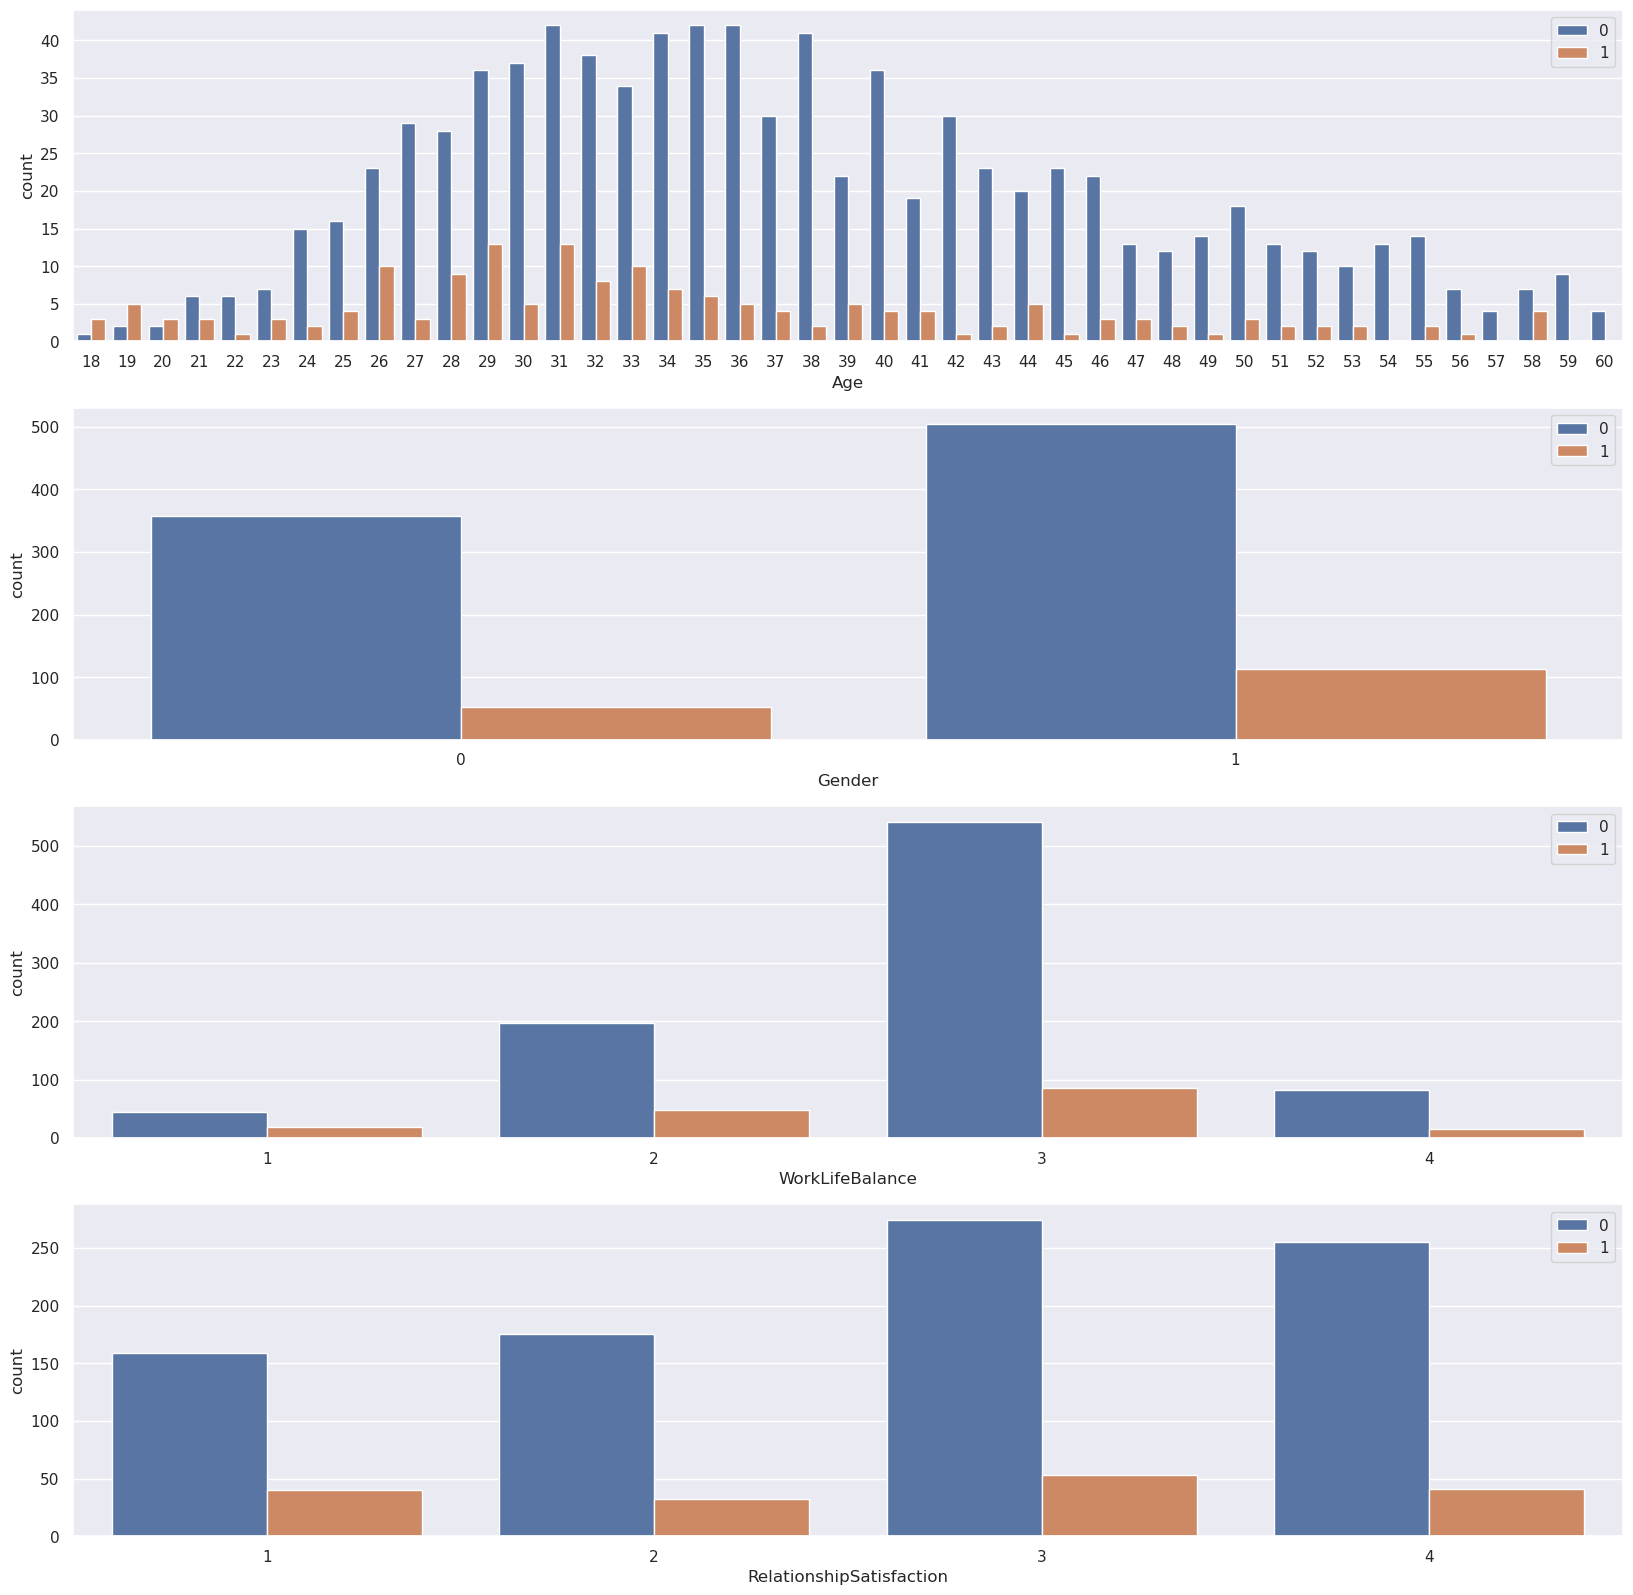

In [1776]:
plt.figure(figsize=(20, 25))
variables = XtrainT[['Age','Gender','WorkLifeBalance', 'RelationshipSatisfaction']]
for i, col in enumerate(variables):
    plt.subplot(5,1, i+1)
    sns.countplot(XtrainT, x=XtrainT[col], hue=ytrainT)
plt.show()

* A las edades 28, 29 y 33, se da mas el Attrition.
* El genero con mas Attrition es el Hombre(Male).
* Los empleado que no estan en el departamento de ventas tiene mas Attrition.
* WorkLifeBalance 3 'Better' tiene mas Attrition.
  ** El balance entre la vida personal y la laboral debe ser optima(4) para no sufrir de Attrition.
* RelationshipSatisfaction 3 'High' y 4 'Very High' Tienen mas Attrition.

In [1777]:
XtrainT

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
1073,28,0,1083,1.648245,1,3,1,96,1,2,...,1,0,0,0,0,1,0,0,0,0
1105,33,0,1242,0.247712,4,1,1,46,3,2,...,0,0,0,1,0,1,0,0,0,0
538,41,0,314,-1.468777,3,4,1,59,2,5,...,0,0,0,0,0,0,0,0,0,0
1300,34,0,810,0.247712,2,2,1,92,4,2,...,0,0,0,1,0,0,0,0,0,1
1382,31,0,976,-0.682272,2,3,1,48,3,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,37,0,1372,-1.468777,3,4,0,42,3,1,...,0,0,1,0,0,1,0,0,0,0
125,26,0,841,-0.041639,3,3,0,46,2,1,...,0,0,1,0,0,0,0,0,1,0
160,22,0,1256,1.173920,1,3,1,80,3,1,...,0,0,1,0,0,0,0,1,0,0
691,40,0,1469,0.369324,4,4,1,35,3,1,...,0,0,1,0,0,0,0,1,0,0


In [1778]:
ytrainT

array([0, 0, 0, ..., 0, 0, 0])

In [1779]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logisticRegr.fit(XtrainT, ytrainT)

LogisticRegression(max_iter=10000)

In [1780]:
XtestT


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
819,28,0,1451,-1.026743,1,1,1,67,2,1,...,0,0,1,0,0,1,0,0,0,0
871,24,1,984,1.119474,2,4,0,97,3,1,...,0,0,0,0,0,1,0,0,0,0
1213,23,1,427,0.149442,3,3,1,99,3,1,...,0,0,0,0,1,1,0,0,0,0
119,43,0,394,1.603673,2,3,1,92,3,4,...,0,0,0,0,0,1,0,0,0,0
544,47,0,217,-0.681431,3,4,0,49,3,4,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,35,0,664,-1.513902,3,2,1,79,3,1,...,0,0,1,0,0,0,0,1,0,0
383,22,0,253,0.634731,3,1,0,43,3,1,...,0,0,1,0,0,0,0,1,0,0
361,40,0,1171,0.530635,4,4,0,46,4,1,...,0,0,0,0,0,1,0,0,0,0
526,39,0,408,-1.026743,4,4,0,80,2,2,...,0,0,0,0,0,0,0,0,0,1


In [1781]:
predictions = logisticRegr.predict(XtestT)

In [1782]:
ytestT

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [1783]:
score = logisticRegr.score(XtestT, ytestT)
print(score)

1.0


In [1784]:
cm = metrics.confusion_matrix(ytestT, predictions)
print(cm)

[[181   0]
 [  0  39]]
